In [1]:
import random
import math
import time
import matplotlib.pyplot as plt
from problema2 import assign_routes, brute_force_hfvrp

In [2]:
def create_problem_instance(seed, num_depots, num_customers):
    random.seed(seed)

    total_nodes = num_depots + num_customers
    
    # Generate fleet capacities for each depot (2-4 vehicles with capacity 50-80 each)
    F = []
    for _ in range(num_depots):
        num_vehicles = random.randint(2, 4)
        vehicle_capacity = random.randint(50, 80)
        vehicle_cost = random.randint(20, 100)
        f = []
        for _ in range(num_vehicles):
            f.append((vehicle_capacity, vehicle_cost))
        F.append(f)
    
    # Generate customer demands (10-30 units each)
    D = [random.randint(10, 30) for _ in range(num_customers)]

    # Generate coordinates
    coordinates = []
    
    # First place all source nodes (depots) in a rough circle
    for i in range(num_depots):
        angle = (2 * 3.14159 * i) / num_depots
        x = 50 + 30 * math.cos(angle)
        y = 50 + 30 * math.sin(angle)
        coordinates.append((x, y))

    # Then place all destination nodes (customers)
    for _ in range(num_customers):
        while True:
            x = random.uniform(10, 90)
            y = random.uniform(10, 90)
            # Ensure minimum distance between nodes
            min_dist = min(math.sqrt((x-cx)**2 + (y-cy)**2) for cx, cy in coordinates)
            if min_dist > 5:  # Minimum 5 units between nodes
                coordinates.append((x, y))
                break
        
    # Calculate distance matrix
    M = [[0] * total_nodes for _ in range(total_nodes)]
    for i in range(total_nodes):
        for j in range(total_nodes):
            if i != j:
                x1, y1 = coordinates[i]
                x2, y2 = coordinates[j]
                M[i][j] = round(math.sqrt((x2-x1)**2 + (y2-y1)**2), 2)
    
                x1, y1 = coordinates[i]
                x2, y2 = coordinates[j]
                M[i][j] = round(math.sqrt((x2-x1)**2 + (y2-y1)**2), 2)
    
    return {
        "F": F,
        "D": D,
        "M": M
    }

In [3]:
def test_hfvrp_example_bf(instance):
    F = instance['F']
    D = instance['D']
    M = instance['M']
    
    print("\nSolving using Brute Force algorithm...")
    solution, found = brute_force_hfvrp(F, D, M)

    if found:
        total_cost = 0
        for depot_idx, routes in solution.items():
            depot_cost = 0
            capacity = 0
            route_cost = sum([D[d - len(F)] for d in routes])
            # print(f"Depot {depot_idx}: total capacity needed {route_cost}")

            F[depot_idx].sort(key=lambda x: x[1])
            for v in F[depot_idx]:
                depot_cost += v[1]
                capacity += v[0]
                if capacity >= route_cost:
                    break

            # print(f"Depot {depot_idx}: {depot_cost:.2f}")
            total_cost += depot_cost
                
        print(f"Total brute force solution cost: {total_cost}")
    else:
        print("\nNo valid solution found!")

    return total_cost

In [4]:
def test_hfvrp_example(instance):
    F = instance['F']
    D = instance['D']
    M = instance['M']

    result, found = assign_routes(F, D, M)

    if found:
        total_cost = 0

        for depot_idx, routes in result.items():
            depot_cost = 0
            capacity = 0
            route_cost = sum([D[d] for d in routes])
            # print(f"Depot {depot_idx}: total capacity needed {route_cost}")

            F[depot_idx].sort(key=lambda x: x[1])
            for v in F[depot_idx]:
                depot_cost += v[1]
                capacity += v[0]
                if capacity >= route_cost:
                    break

            # print(f"Depot {depot_idx}: {depot_cost:.2f}")
            total_cost += depot_cost
                
        print(f"Total solution cost: {total_cost}")
    else:
        print("\nNo valid solution found!")
    return total_cost

In [5]:
brute_force_times = []
greedy_times = []
brute_force_costs = []
greedy_costs = []

test_cases = [
    create_problem_instance(29, 2, 10),
    create_problem_instance(29, 3, 12),
    create_problem_instance(29, 4, 15),
    create_problem_instance(29, 5, 20),
]

In [6]:
for instance in test_cases:
    start_time = time.time()
    result = test_hfvrp_example_bf(instance)
    end_time = time.time() - start_time
    brute_force_times.append(end_time)
    brute_force_costs.append(result)

    start_time = time.time()
    result = test_hfvrp_example(instance)
    end_time = time.time() - start_time
    greedy_times.append(end_time)
    greedy_costs.append(result)


Solving using Brute Force algorithm...
Total brute force solution cost: 161
Total solution cost: 289

Solving using Brute Force algorithm...
Total brute force solution cost: 246
Total solution cost: 492

Solving using Brute Force algorithm...
Total brute force solution cost: 319
Total solution cost: 520

Solving using Brute Force algorithm...
Total brute force solution cost: 352
Total solution cost: 789


Imagen guardada como 'comparacion_algoritmos.png'


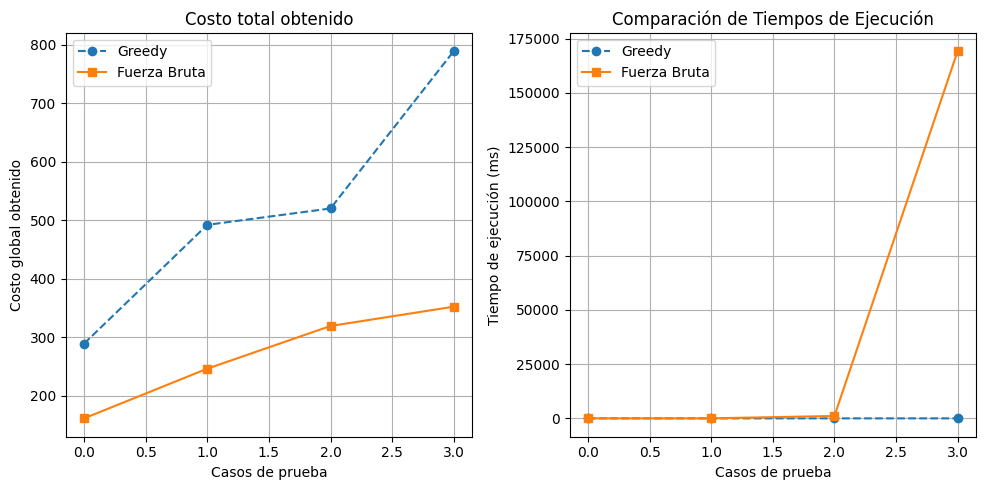

In [10]:
def plot_results():
    case_numbers = [i for i in range(len(test_cases))]
    greedy_times_ms = [t * 1000 for t in greedy_times]
    brute_force_times_ms = [t * 1000 for t in brute_force_times]

    plt.figure(figsize=(15, 5))

    # Gráfico de costo obtenido
    plt.subplot(1, 3, 1)
    plt.plot(case_numbers, greedy_costs, marker='o', label="Greedy", linestyle="--")
    plt.plot(case_numbers, brute_force_costs, marker='s', label="Fuerza Bruta", linestyle="-")
    plt.xlabel("Casos de prueba")
    plt.ylabel("Costo global obtenido")
    plt.title("Costo total obtenido")
    plt.legend()
    plt.grid(True)

    # Gráfico de tiempo de ejecución en milisegundos
    plt.subplot(1, 3, 2)
    plt.plot(case_numbers, greedy_times_ms, marker='o', label="Greedy", linestyle="--")
    plt.plot(case_numbers, brute_force_times_ms, marker='s', label="Fuerza Bruta", linestyle="-")
    plt.xlabel("Casos de prueba")
    plt.ylabel("Tiempo de ejecución (ms)")
    plt.title("Comparación de Tiempos de Ejecución")
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    
    plt.savefig("./comparacion_algoritmos.png", dpi=300)
    print("Imagen guardada como 'comparacion_algoritmos.png'")
    
    plt.show()

plot_results()